In [1]:
# %matplotlib ipympl
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv("train.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='Sex', ylabel='count'>

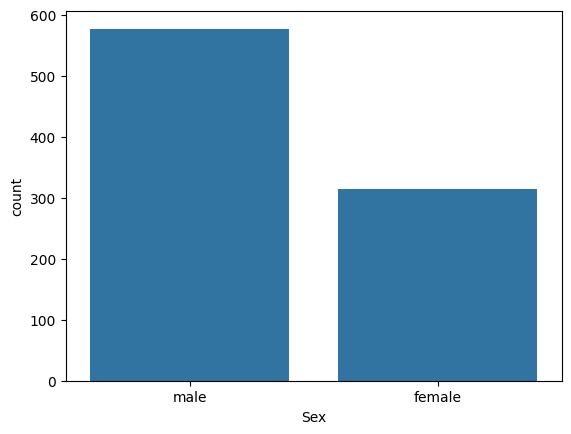

In [4]:
sns.countplot(titanic_df, x="Sex")

<AxesSubplot: xlabel='Pclass', ylabel='count'>

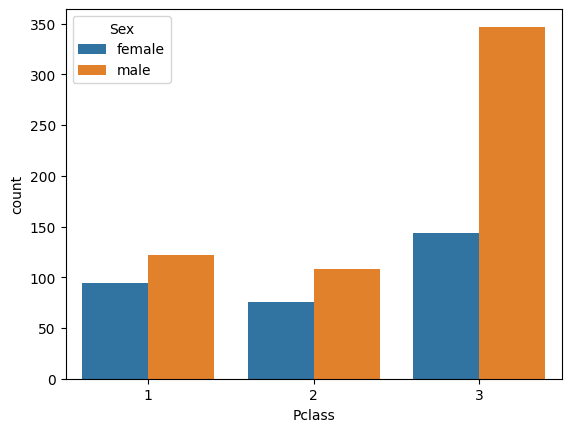

In [5]:
sns.countplot(titanic_df, x="Pclass", hue="Sex")

In [6]:
def male_fem_child(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return sex

In [7]:
titanic_df["Person"] = titanic_df[["Age", "Sex"]].apply(male_fem_child, axis=1)

<AxesSubplot: xlabel='Pclass', ylabel='count'>

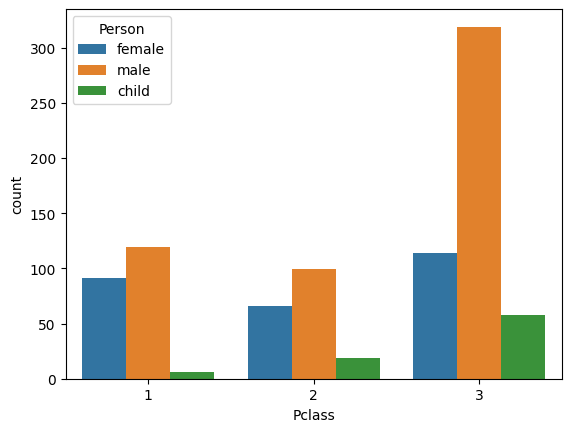

In [8]:
sns.countplot(titanic_df, x="Pclass", hue="Person")

<AxesSubplot: >

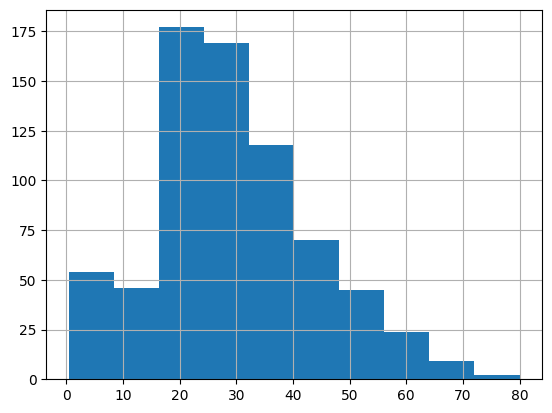

In [9]:
titanic_df["Age"].hist(bins=10)

<AxesSubplot: xlabel='Age', ylabel='Percent'>

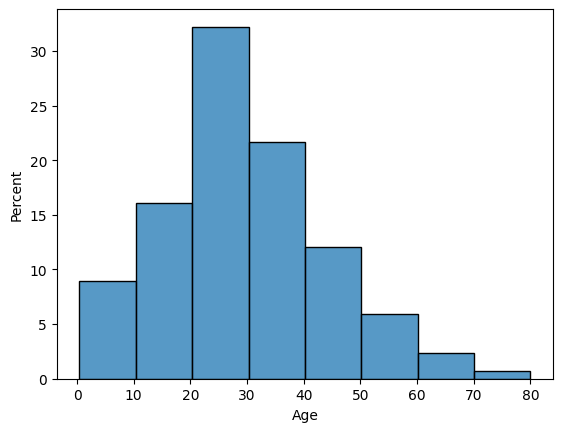

In [10]:
sns.histplot(titanic_df, x="Age", binwidth=10, stat="percent")

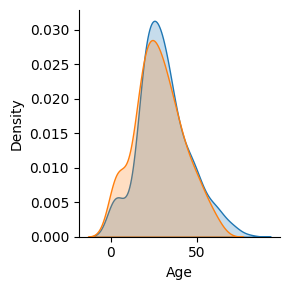

In [11]:
fig = sns.FacetGrid(titanic_df, hue="Sex")
fig.map(sns.kdeplot, "Age", fill=True) # kde plot is like a smoothed out histogram
# fig.set(xlim=(0, titanic_df["Age"].max()))
# fig.add_legend()

<AxesSubplot: xlabel='Age', ylabel='Density'>

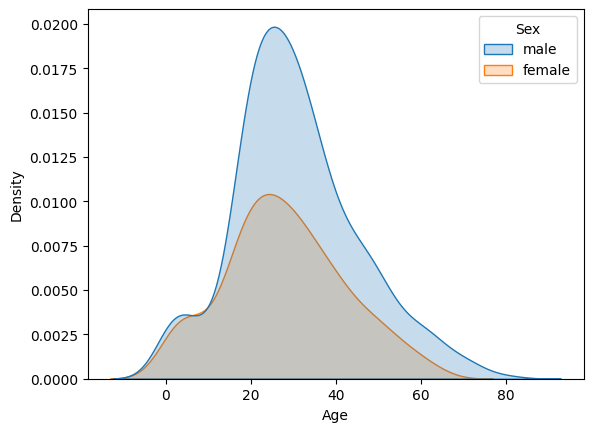

In [12]:
sns.kdeplot(titanic_df, x="Age", hue="Sex", fill=True)

<AxesSubplot: xlabel='Cabin', ylabel='count'>

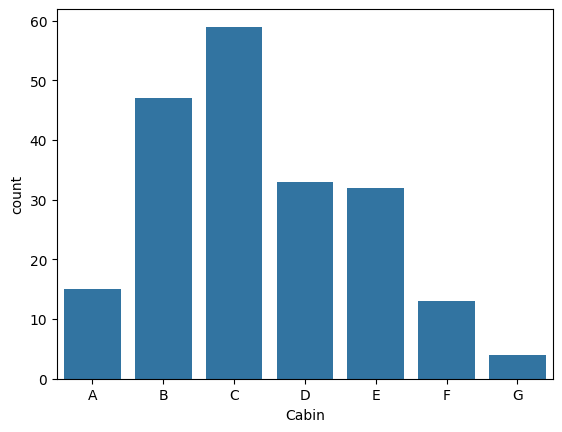

In [13]:
levels = []
cabins = titanic_df["Cabin"].dropna()
for c in cabins:
    levels.append(c[0])
cabin_df = DataFrame(levels, columns=["Cabin"])
cabin_df.sort_values(by=["Cabin"], inplace=True)
cabin_df = cabin_df[cabin_df["Cabin"] != "T"] # remove T's, they're bogus
sns.countplot(cabin_df, x="Cabin")

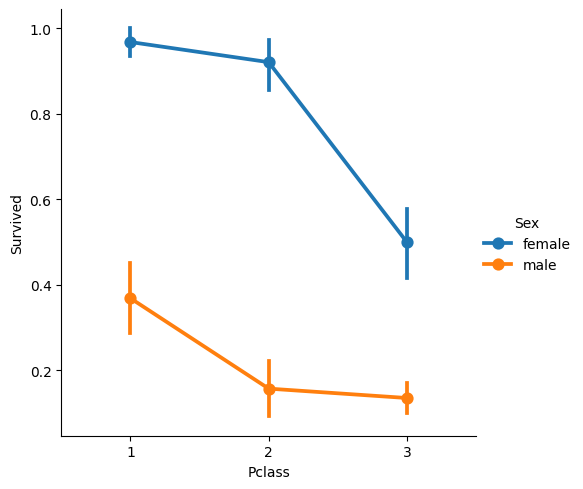

In [14]:
sns.catplot(titanic_df, x="Pclass", y="Survived", hue="Sex", kind="point")

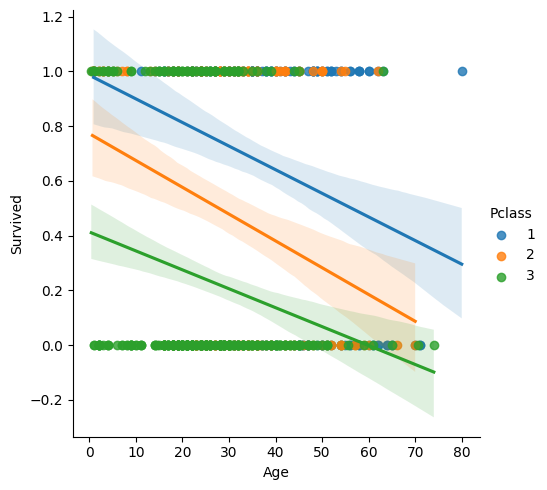

In [15]:
sns.lmplot(titanic_df, x="Age", y="Survived", hue="Pclass")

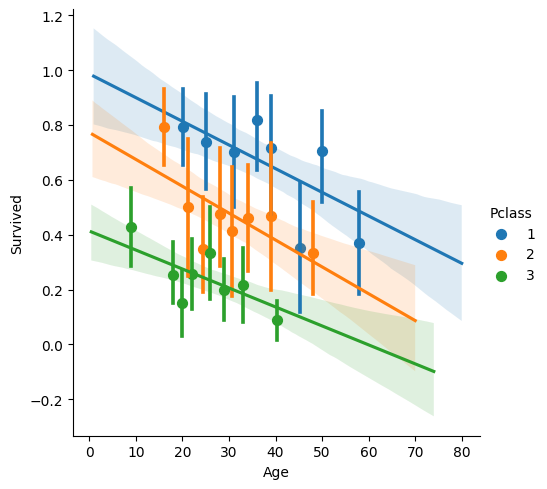

In [16]:
sns.lmplot(titanic_df, x="Age", y="Survived", hue="Pclass", x_bins=8)

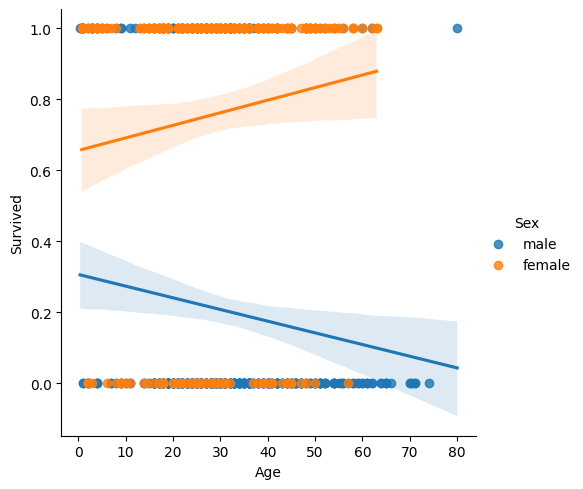

In [17]:
sns.lmplot(titanic_df, x="Age", y="Survived", hue="Sex")

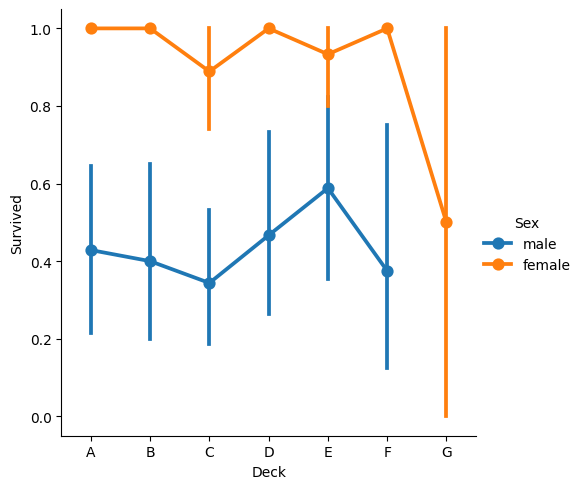

In [18]:
levels = []
df_with_cabins = DataFrame(titanic_df[titanic_df["Cabin"].notna()])
cabins = df_with_cabins["Cabin"]
for c in cabins:
    levels.append(c[0])
df_with_cabins["Deck"] = df_with_cabins["Cabin"].apply(lambda s:s[0])
df_with_cabins = df_with_cabins[df_with_cabins["Deck"] != "T"] # remove T's, they're bogus
df_with_cabins.sort_values(by=["Deck"], inplace=True)

sns.catplot(df_with_cabins, x="Deck", y="Survived", hue="Sex", kind="point")